In [1]:
import os
import numpy as np
import pandas as pd
import pathlib
from collections import namedtuple
import seaborn as sns
import mplhep as hep
import matplotlib.pyplot as plt

import pofah.jet_sample as jesa
import laspaclu.src.util.string_constants as stco

In [51]:
#****************************************#
#               RUNTIME PARAMS
#****************************************#

sample_id_qcd = 'qcdSig'
sample_id_sig = 'GtoWW35na'

Parameters = namedtuple('Parameters', ' run_n read_n dims_n')
params = Parameters(run_n=50, read_n=int(1e2), dims_n=8)

input_dir = "/eos/user/k/kiwoznia/data/laspaclu_results/latent_rep/ae_run_"+str(params.run_n)


In [52]:
#****************************************#
#               READ DATA
#****************************************#

# read qcd
file_name = os.path.join(input_dir, sample_id_qcd+'.h5')
print('>>> reading {} events from {}'.format(str(params.read_n), file_name))
sample_qcd = jesa.JetSampleLatent.from_input_file(name=sample_id_qcd, path=file_name, read_n=params.read_n)
l1, l2 = sample_qcd.get_latent_representation()

feat_names = [r"$z_{"+str(z+1)+"}$" for z in range(l1.shape[1])]

df_l1_qcd = pd.DataFrame(l1,columns=feat_names).iloc[:,:params.dims_n]
df_l2_qcd = pd.DataFrame(l2,columns=feat_names).iloc[:,:params.dims_n]
df_l1_qcd['sample_id'] = sample_id_qcd
df_l2_qcd['sample_id'] = sample_id_qcd

# read signal
file_name = os.path.join(input_dir, sample_id_sig+'.h5')
print('>>> reading {} events from {}'.format(str(params.read_n), file_name))
sample_sig = jesa.JetSampleLatent.from_input_file(name=sample_id_sig, path=file_name, read_n=params.read_n)
l1, l2 = sample_sig.get_latent_representation()
df_l1_sig = pd.DataFrame(l1,columns=feat_names).iloc[:,:params.dims_n]
df_l2_sig = pd.DataFrame(l2,columns=feat_names).iloc[:,:params.dims_n]
df_l1_sig['sample_id'] = sample_id_sig
df_l2_sig['sample_id'] = sample_id_sig

df_j1 = df_l1_qcd.append(df_l1_sig, ignore_index=True)
df_j2 = df_l2_qcd.append(df_l2_sig, ignore_index=True)

df_j1 = df_j1.assign(sample_label=df_j1.sample_id.map({sample_id_qcd: stco.sample_name_dict[sample_id_qcd], sample_id_sig: stco.sample_name_dict[sample_id_sig]}))
df_j2 = df_j2.assign(sample_label=df_j2.sample_id.map({sample_id_qcd: stco.sample_name_dict[sample_id_qcd], sample_id_sig: stco.sample_name_dict[sample_id_sig]}))


>>> reading 100 events from /eos/user/k/kiwoznia/data/laspaclu_results/latent_rep/ae_run_50/qcdSig.h5
>>> reading 100 events from /eos/user/k/kiwoznia/data/laspaclu_results/latent_rep/ae_run_50/GtoWW35na.h5


In [53]:
#****************************************#
#               PLOT SCATTER
#****************************************#

sns.set_style(hep.style.CMS)
palette = {sample_id_qcd : stco.bg_blue, sample_sig : stco.multi_sig_palette[3]}
fig_dir = stco.reporting_fig_base_dir+'/ae_run_'+str(params.run_n)
pathlib.Path(fig_dir).mkdir(parents=True, exist_ok=True)

print('plotting latent space pair scatter plot to {}'.format(fig_dir))

plotting latent space pair scatter plot to results/fig/ae_run_50


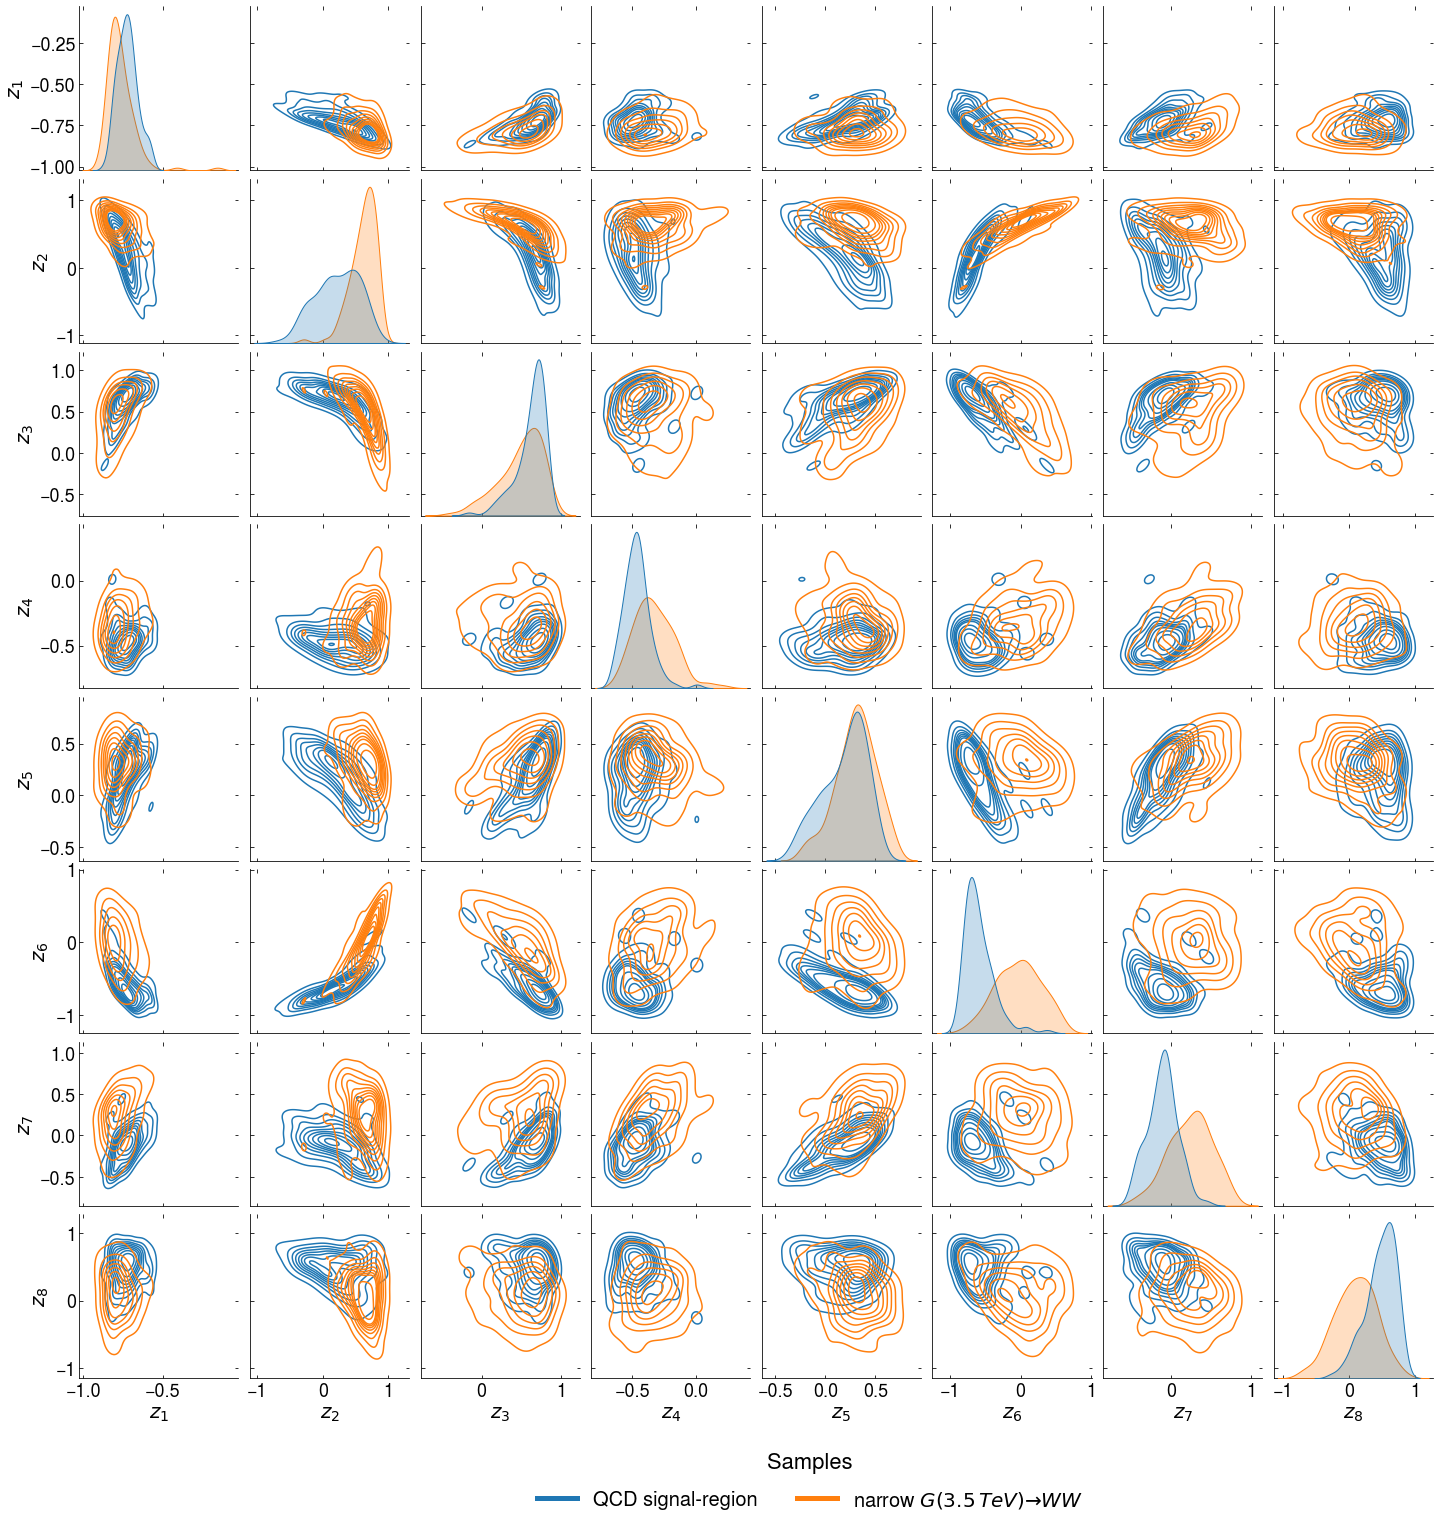

In [58]:
plot1 = sns.pairplot(df_j1, hue='sample_label', kind='kde')
sns.move_legend(plot1, bbox_to_anchor=(0.5, -0.07), loc="lower center", ncol=2, labelspacing=0.8, title='Samples',
               fontsize=20, title_fontsize=22)
for ax in plot1.figure.axes:
    ax.tick_params(labelsize=18)
    ax.xaxis.label.set_size(20)
    ax.yaxis.label.set_size(20)
leg = plot1.legend
for line in leg.get_lines():
    line.set_linewidth(5.0)

In [45]:
dir(leg)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_agg_filter',
 '_alpha',
 '_animated',
 '_auto_legend_data',
 '_axes',
 '_bbox_to_anchor',
 '_clipon',
 '_clippath',
 '_contains',
 '_custom_handler_map',
 '_default_contains',
 '_default_handler_map',
 '_draggable',
 '_find_best_position',
 '_findoffset',
 '_fontsize',
 '_get_anchored_bbox',
 '_get_clipping_extent_bbox',
 '_get_loc',
 '_gid',
 '_in_layout',
 '_init_legend_box',
 '_label',
 '_legend_box',
 '_legend_handle_box',
 '_legend_title_box',
 '_loc',
 '_loc_real',
 '_loc_used_default',
 '_mode',
 '_mouseover',
 '_ncol',
 '_oid',
 '_path_effects',
 '_picker',
 '_propobservers',
 '_rasterized',
 '_

In [46]:
lines = leg.get_lines()

In [47]:
lines